In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.drop(labels='species', axis=1)
y = df['species']

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 105, X_test size: 45
y_train size: 105, y_test size: 45


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'tol': np.linspace(0.0001, 1, 20),
    'C': np.logspace(0, 10, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'l1_ratio': np.linspace(0, 1, 20)
}

In [49]:
grid_search = GridSearchCV(
                estimator=LogisticRegression(max_iter=5000),
                param_grid=param_grid,
                n_jobs=-1,
                verbose=1
                )

grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 120000 candidates, totalling 600000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4120 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 20120 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 42520 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 71320 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 106520 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 148120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196120 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250520 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 311320 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 373640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 419640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 469640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 523640 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]:

0.980952380952381
{'C': 3.3598182862837818, 'l1_ratio': 0.7894736842105263, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.10535263157894738}
LogisticRegression(C=3.3598182862837818, l1_ratio=0.7894736842105263,
                   max_iter=5000, solver='sag', tol=0.10535263157894738)


In [96]:
best_estimator = LogisticRegression(
                     penalty='l2',
                     C=3.3598182862837818, 
                     l1_ratio=.7894736842105263,
                     max_iter=7500, 
                     solver='sag', 
                     tol=0.10535263157894738).fit(X_train_scaled, y_train)

In [97]:
y_pred = best_estimator.predict(X_test_scaled)

In [98]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9777777777777777

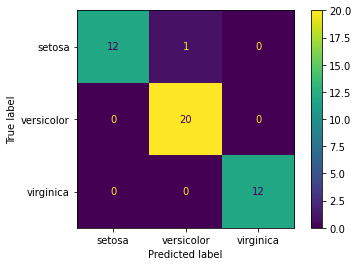

In [99]:
plot_confusion_matrix(
    estimator=best_estimator,
    X=X_test_scaled,
    y_true=y_test
);

In [100]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        13
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [101]:
final_model = best_estimator.fit(X,y)

In [102]:
y_hat = final_model.predict(X)

In [103]:
accuracy_score(y_true=y, y_pred=y_hat)

0.98

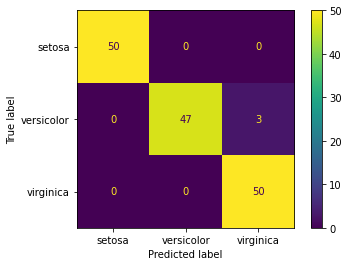

In [104]:
plot_confusion_matrix(
    estimator=final_model,
    X=X,
    y_true=y
);

In [105]:
d = pd.DataFrame([y,y_hat]).T
d[d['species'] != d['Unnamed 0']]

,species,Unnamed 0
70,versicolor,virginica
83,versicolor,virginica
84,versicolor,virginica
